In [1]:
# getting the data
# !curl  https://archive.ics.uci.edu/ml/machine-learning-databases/00193/CTG.xls --output CTG.xls

**SOURCE**		J Bernardes, Faculdade de Medicina, Universidade do Porto, Porto, Portugal
Reference: D Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318		
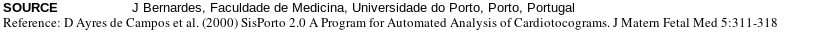

# First model 
Trying to run a model as fast as possible and getting a base line accuracy

In [2]:
import pandas as pd

xls = pd.ExcelFile('CTG.xls')
df = pd.read_excel(xls, 'Data', header=1)
df.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0


In [3]:
df.columns

Index(['b', 'e', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'DR', 'Unnamed: 9', 'LB',
       'AC.1', 'FM.1', 'UC.1', 'DL.1', 'DS.1', 'DP.1', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency', 'Unnamed: 31', 'A', 'B', 'C', 'D',
       'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'Unnamed: 42', 'CLASS',
       'Unnamed: 44', 'NSP'],
      dtype='object')

In [4]:
three_classes = ['NSP'] # 1, 2, 3
ten_classes = 'A, B, C, D, E, AD, DE, LD, FS, SUSP'.split(', ')

In [5]:
ten_classes

['A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP']

In [6]:
# the number of unnamed columns (empty ones in the excel sheet)
len([x for x in df.columns if 'Unnamed' in x])

4

In [7]:
# drop unnamed columns
unnamed = [x for x in df.columns if 'Unnamed' in x]
df.drop(unnamed, axis=1, inplace=True)

print(f"Droped {unnamed}")

Droped ['Unnamed: 9', 'Unnamed: 31', 'Unnamed: 42', 'Unnamed: 44']


In [8]:
df.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,9.0,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,133.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,134.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,132.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,1.0


In [10]:
df.isnull().sum()

b           3
e           3
AC          3
FM          2
UC          2
DL          1
DS          1
DP          1
DR          1
LB          3
AC.1        3
FM.1        2
UC.1        2
DL.1        1
DS.1        1
DP.1        1
ASTV        2
MSTV        2
ALTV        2
MLTV        2
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           2
B           2
C           2
D           2
E           2
AD          2
DE          2
LD          2
FS          2
SUSP        2
CLASS       3
NSP         3
dtype: int64

In [11]:
# drop null rows
df.dropna(axis=0, inplace=True)

In [12]:
df.isna().sum()

b           0
e           0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
DR          0
LB          0
AC.1        0
FM.1        0
UC.1        0
DL.1        0
DS.1        0
DP.1        0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [13]:
df.describe()

,b,e,AC,FM,UC,DL,DS,DP,DR,LB,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,878.439793,1702.877234,2.722484,7.241298,3.659925,1.570085,0.003293,0.126058,0.0,133.303857,...,-0.950141,-0.923801,-0.932267,-0.687676,-0.762935,-0.899341,-0.935089,-0.814675,4.509878,1.304327
std,894.084748,930.919143,3.560850,37.125309,2.847094,2.499229,0.057300,0.464361,0.0,9.840844,...,0.311894,0.382964,0.361856,0.726188,0.646627,0.437350,0.354495,0.580054,3.026883,0.614377
min,0.000000,287.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,106.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,55.000000,1009.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,126.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000,1.000000
50%,538.000000,1241.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,133.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.000000,1.000000
75%,1521.000000,2434.750000,4.000000,2.000000,5.000000,3.000000,0.000000,0.000000,0.0,140.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,7.000000,1.000000
max,3296.000000,3599.000000,26.000000,564.000000,23.000000,16.000000,1.000000,4.000000,0.0,160.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,3.000000


In [14]:
# drop 10 classes columns and target
df.drop(ten_classes, axis=1, inplace=True)
df.drop(['CLASS'], axis=1, inplace=True)

In [15]:
# drop b,e and old features
old_features = df.columns[:9]
df.drop(old_features, axis=1, inplace=True)
old_features

Index(['b', 'e', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'DR'], dtype='object')

In [16]:
df.dtypes

LB          float64
AC.1        float64
FM.1        float64
UC.1        float64
DL.1        float64
DS.1        float64
DP.1        float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Min         float64
Max         float64
Nmax        float64
Nzeros      float64
Mode        float64
Mean        float64
Median      float64
Variance    float64
Tendency    float64
NSP         float64
dtype: object

In [17]:
df.iloc[:, :-1]

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,120.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.002561,0.000000,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000000,0.000000,0.007426,0.000000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.000775,0.000000,0.006971,0.000000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [20]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [22]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,
                                                     random_state=42)

In [23]:
(x_train.shape, y_train.shape), (x_valid.shape, y_valid.shape)

(((1700, 21), (1700,)), ((426, 21), (426,)))

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier(oob_score=True)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
rf.oob_score_

0.9394117647058824

In [35]:
rf.score(x_train, y_train)

1.0

In [36]:
rf.score(x_valid, y_valid)

0.9460093896713615

In [91]:
rf = RandomForestClassifier(n_estimators=40, max_features=0.5, n_jobs=-1, oob_score=True)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [92]:
rf.oob_score_

0.9364705882352942

In [93]:
rf.score(x_train, y_train)

1.0

In [94]:
rf.score(x_valid, y_valid)

0.9507042253521126

# Actual 

### The Dataset - Cadiotocographics data
- The dataset is a collection of 2126 of **fetal heart rate (FHR) signals**.

- Why is the dataset interesting?
FHR and other types of data in Cardiotocography(CTG) are recoded during cases like pregnancy. But most of the time it is done **manually**, that may produce human errors. So automated way to understand and interpret these CTGs would be very beneftial

In [34]:
# modules
import pandas as pd
import numpy as np

In [43]:
import pandas as pd

xls = pd.ExcelFile('CTG.xls')
df = pd.read_excel(xls, 'Data', header=1)
df.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0


In [44]:
df.shape

(2129, 46)

**We have 3 more rows than expected, some statistic data is put at the end of the file**

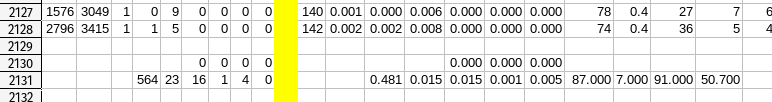

In [45]:
df.tail()

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
2124,1576.0,3049.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,NaN,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,5.0,NaN,2.0
2125,2796.0,3415.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,1.0,NaN,1.0
2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,...,72.0,332.0,252.0,107.0,69.0,197.0,NaN,NaN,NaN,NaN
2128,NaN,NaN,NaN,564.0,23.0,16.0,1.0,4.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# drop the last 3 rows
df = df.iloc[:-3, :]
if df.shape[0] == 2126:
    print(f'Correct number of rows: {df.shape[0]}')
df.tail()

Correct number of rows: 2126


,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
2121,2059.0,2867.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,NaN,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,5.0,NaN,2.0
2122,1576.0,2867.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,NaN,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,5.0,NaN,2.0
2123,1576.0,2596.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,NaN,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,5.0,NaN,2.0
2124,1576.0,3049.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,NaN,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,5.0,NaN,2.0
2125,2796.0,3415.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,1.0,NaN,1.0


In [47]:
# Removing unnamed columns (Empty columns from the excel sheet)
unnamed_cols = [x for x in df.columns if 'Unnamed' in x]

# check if the columns are really empty
for col in unnamed_cols:
    assert df[col].sum() == 0, f'Column:{col} is not empty!!'

# drop unnamed columns
df.drop(unnamed_cols, axis=1, inplace=True)

print(f"Droped #{len(unnamed_cols)} columns.")

Droped #4 columns.


In [48]:
# Target Columns 
three_classes_target = ['NSP'] # 1, 2, 3
ten_classes = 'A, B, C, D, E, AD, DE, LD, FS, SUSP'.split(', ')
ten_classes_target = 'CLASS'

We are working on the 3 classes probelm (**NSP**)

In [49]:
# drop 10 classes columns and target
df.drop(ten_classes, axis=1, inplace=True)
df.drop(['CLASS'], axis=1, inplace=True)

**Droping Old Features**

**b**: The start of the instant

**e**: The end of the instant

**DR**: was always 0, so it will not make a difference

The features **['AC', 'FM', 'UC', 'DL', 'DS', 'DP']** are calculated by dividing them by `e-b` and put in new columns with the same name, so we drop the old ones.

In [50]:
# drop b,e and old features
old_features = df.columns[:9]
df.drop(old_features, axis=1, inplace=True)
print(f"The dropped Features: \n{old_features}")

The dropped Features: 
Index(['b', 'e', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'DR'], dtype='object')


In [51]:
df.head()

,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.002561,0.0,0.007682,0.002561,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


### **Types of features, categorical vs continuous**

In [52]:
df.dtypes.unique()

array([dtype('float64')], dtype=object)

In [68]:
# Number of unique values per feature if unique <= 10
for col in df.columns:
    if df[col].nunique() <= 10:
        print(f"{col}: {df[col].nunique()}")

DS.1: 8
Nzeros: 9
Tendency: 3
NSP: 3


In [65]:
pd.value_counts(df['DS.1'])

0.000000    2119
0.001079       1
0.000948       1
0.001029       1
0.000890       1
0.001353       1
0.001178       1
0.001144       1
Name: DS.1, dtype: int64

In [69]:
pd.value_counts(df.Nzeros)

0.0     1624
1.0      366
2.0      108
3.0       21
5.0        2
4.0        2
7.0        1
8.0        1
10.0       1
Name: Nzeros, dtype: int64

In [70]:
pd.value_counts(df.Tendency)

 0.0    1115
 1.0     846
-1.0     165
Name: Tendency, dtype: int64

In [71]:
pd.value_counts(df.NSP)

1.0    1655
2.0     295
3.0     176
Name: NSP, dtype: int64